In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the static annotations dataset
# Replace 'path_to_static_annotations.csv' with the actual path to the dataset
static_annotations = pd.read_csv('/kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')
static_annotations.columns = static_annotations.columns.str.strip()
# Display the first few rows of the dataset
print("Dataset Preview:")
print(static_annotations.head())

# Basic information about the dataset
print("\nDataset Info:")
print(static_annotations.info())

# Summary statistics
print("\nSummary Statistics:")
print(static_annotations.describe())


Dataset Preview:
   song_id  valence_mean  valence_std  arousal_mean  arousal_std
0        2           3.1         0.94           3.0         0.63
1        3           3.5         1.75           3.3         1.62
2        4           5.7         1.42           5.5         1.63
3        5           4.4         2.01           5.3         1.85
4        7           5.8         1.47           6.4         1.69

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_id       1744 non-null   int64  
 1   valence_mean  1744 non-null   float64
 2   valence_std   1744 non-null   float64
 3   arousal_mean  1744 non-null   float64
 4   arousal_std   1744 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 68.2 KB
None

Summary Statistics:
           song_id  valence_mean  valence_std  arousal_mean  arousal_std
count  1744.000000   

In [12]:
print("Columns in the dataset:")
print(static_annotations.columns)


Columns in the dataset:
Index(['song_id', 'valence_mean', 'valence_std', 'arousal_mean',
       'arousal_std'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


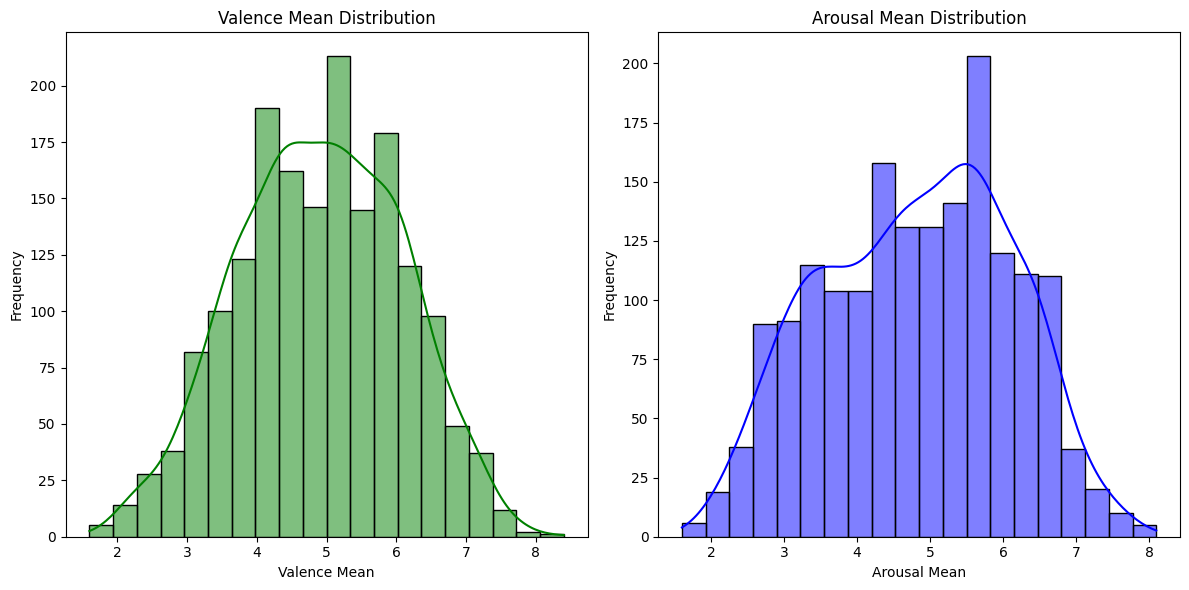

In [13]:
# Check the distribution of valence_mean and arousal_mean
plt.figure(figsize=(12, 6))

# Valence_mean distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_mean'], kde=True, color='green', bins=20)
plt.title('Valence Mean Distribution')
plt.xlabel('Valence Mean')
plt.ylabel('Frequency')

# Arousal_mean distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_mean'], kde=True, color='blue', bins=20)
plt.title('Arousal Mean Distribution')
plt.xlabel('Arousal Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


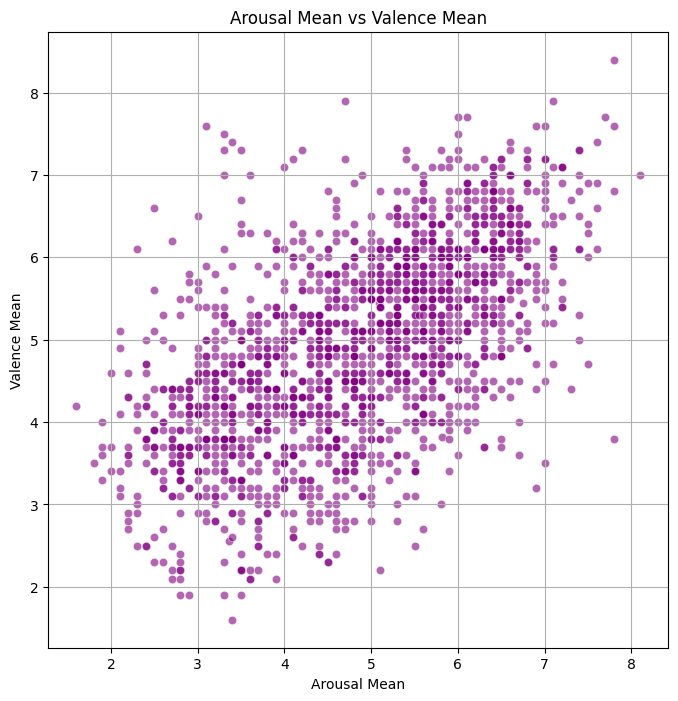

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


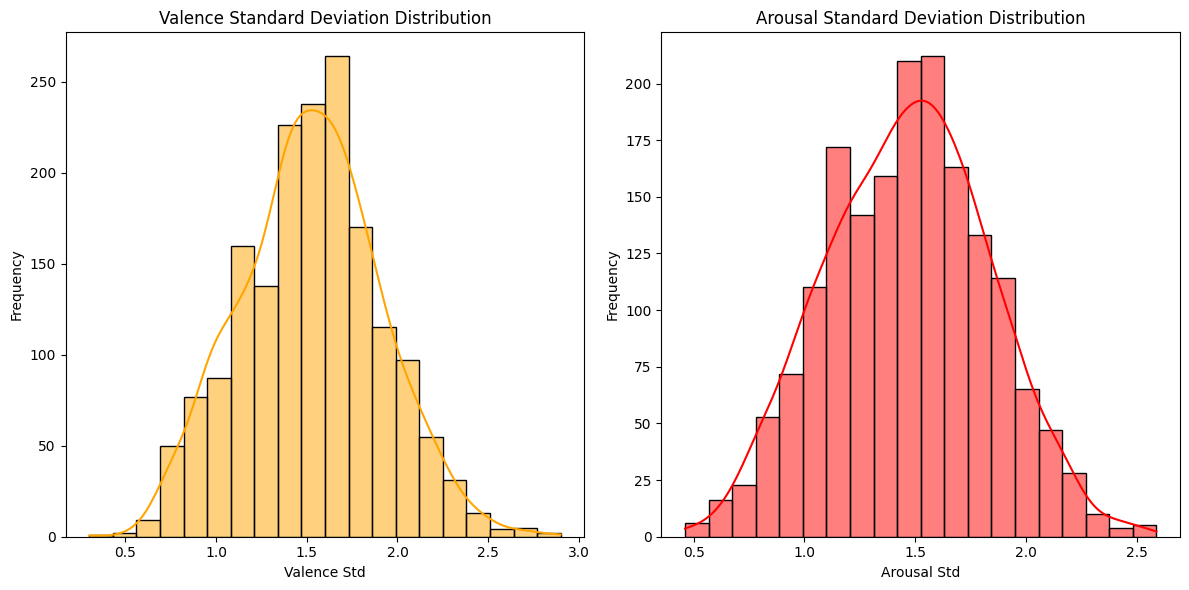

<Figure size 640x480 with 0 Axes>

In [34]:

# Scatter plot for arousal_mean vs valence_mean
plt.figure(figsize=(8, 8))
sns.scatterplot(x='arousal_mean', y='valence_mean', data=static_annotations, alpha=0.6, color='purple')
plt.title('Arousal Mean vs Valence Mean')
plt.xlabel('Arousal Mean')
plt.ylabel('Valence Mean')
plt.grid(True)
plt.show()

# Analyze variability (std columns)
plt.figure(figsize=(12, 6))

# Valence_std distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_std'], kde=True, color='orange', bins=20)
plt.title('Valence Standard Deviation Distribution')
plt.xlabel('Valence Std')
plt.ylabel('Frequency')

# Arousal_std distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_std'], kde=True, color='red', bins=20)
plt.title('Arousal Standard Deviation Distribution')
plt.xlabel('Arousal Std')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os

# Load static annotations dataset
# Replace 'path_to_static_annotations.csv' with the correct file path
# static_annotations = pd.read_csv('/kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')

# Define separate thresholds for arousal and valence
arousal_low_threshold = 2
arousal_high_threshold = 7.5
arousal_medium_range = (5, 5)

valence_low_threshold = 2
valence_high_threshold = 7.5
valence_medium_range = (5, 5)

# Categorize based on arousal
arousal_low = static_annotations[static_annotations['arousal_mean'] < arousal_low_threshold]
arousal_high = static_annotations[static_annotations['arousal_mean'] > arousal_high_threshold]
arousal_medium = static_annotations[static_annotations['arousal_mean'].between(*arousal_medium_range)]

# Categorize based on valence
valence_low = static_annotations[static_annotations['valence_mean'] < valence_low_threshold]
valence_high = static_annotations[static_annotations['valence_mean'] > valence_high_threshold]
valence_medium = static_annotations[static_annotations['valence_mean'].between(*valence_medium_range)]

# Print counts for each category
print(f"Arousal Low: {len(arousal_low)} songs")
print(f"Arousal High: {len(arousal_high)} songs")
print(f"Arousal Medium: {len(arousal_medium)} songs")
print(f"Valence Low: {len(valence_low)} songs")
print(f"Valence High: {len(valence_high)} songs")
print(f"Valence Medium: {len(valence_medium)} songs")

# Function to play audio and display waveform + spectrogram (with log scale)
def play_audio_with_visuals(file_path):
    print(f"Playing: {file_path}")
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file
    
    # Plot waveform and spectrogram
    plt.figure(figsize=(12, 6))

    # Waveform plot
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Spectrogram plot with log scale
    plt.subplot(2, 1, 2)
    S = librosa.stft(y)  # Compute Short-Time Fourier Transform (STFT)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convert amplitude to decibels
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')  # Log scale for frequency
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Log Scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

    # Play audio
    display(Audio(file_path))


Arousal Low: 6 songs
Arousal High: 10 songs
Arousal Medium: 51 songs
Valence Low: 5 songs
Valence High: 10 songs
Valence Medium: 52 songs


# Arousal low

Id can be 0 to  6
Extreme Low Example: song_id         745.00
valence_mean      4.20
valence_std       1.08
arousal_mean      1.60
arousal_std       0.66
Name: 583, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/1118.mp3


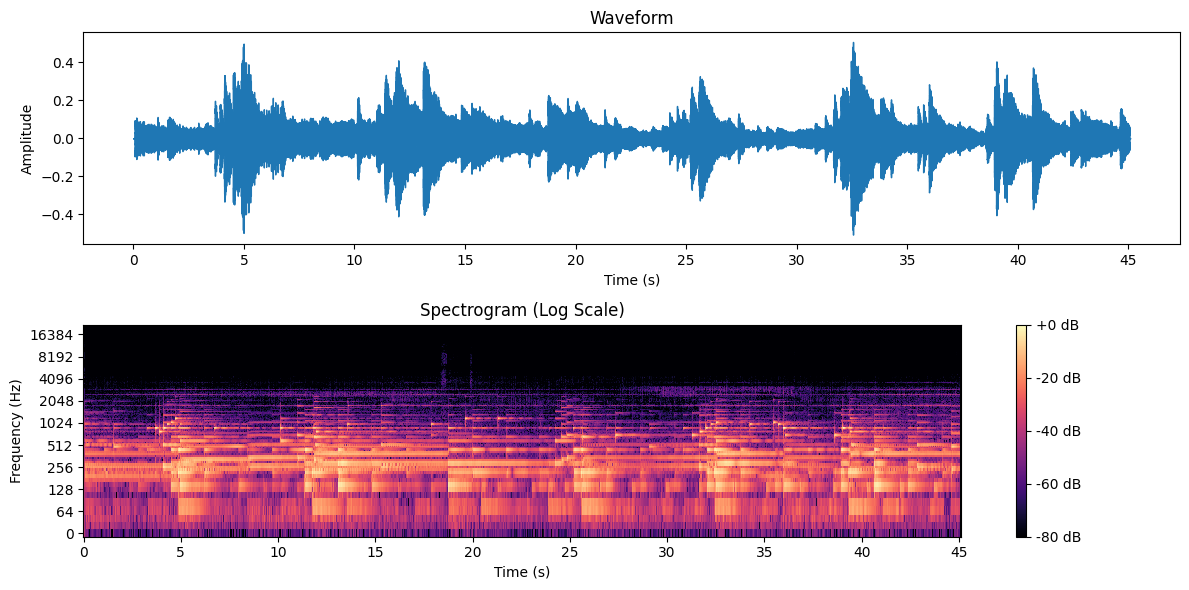

In [46]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_low))
audio_id = 0
audio_path = "/kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio"
if not arousal_low.empty:
    print("Extreme Low Example:", arousal_low.iloc[0])
    low_audio_path = os.path.join(audio_path, f"{int(arousal_low.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(low_audio_path)


# Arousal Medium

Id can be 0 to  51
Extreme Low Example: song_id         105.00
valence_mean      6.50
valence_std       1.43
arousal_mean      5.00
arousal_std       1.41
Name: 79, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/105.mp3


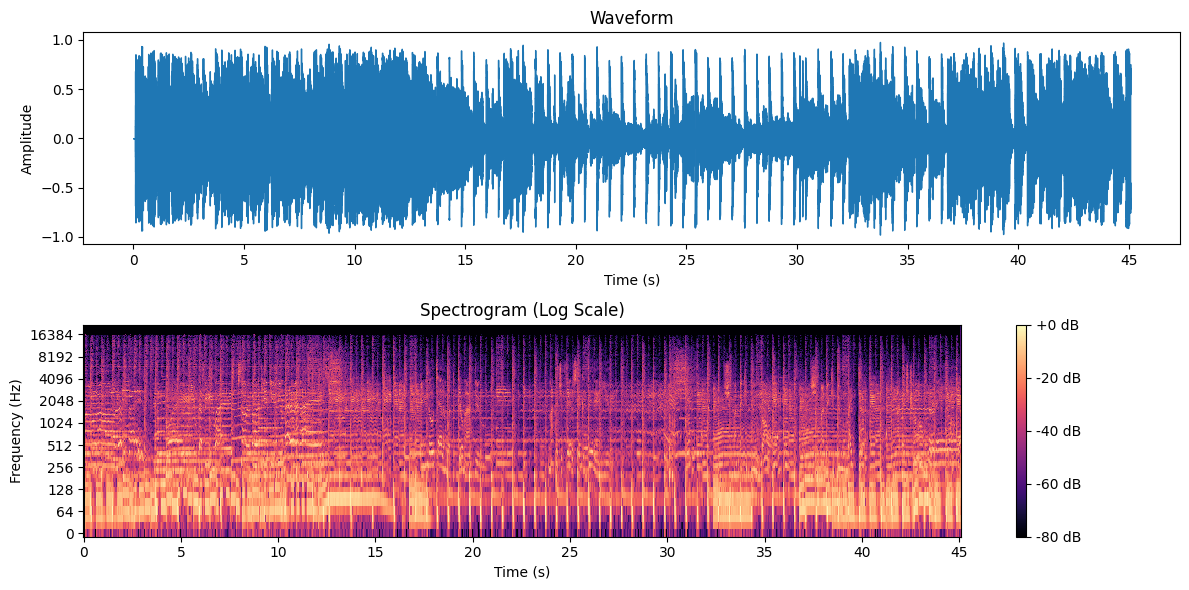

In [47]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_medium))
audio_id = 0
if not arousal_medium.empty:
    print("Extreme Low Example:", arousal_medium.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(arousal_medium.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


# Arousal High

Id can be 0 to  10
arousal_high Example: song_id         115.00
valence_mean      8.40
valence_std       0.66
arousal_mean      7.80
arousal_std       1.17
Name: 89, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/115.mp3


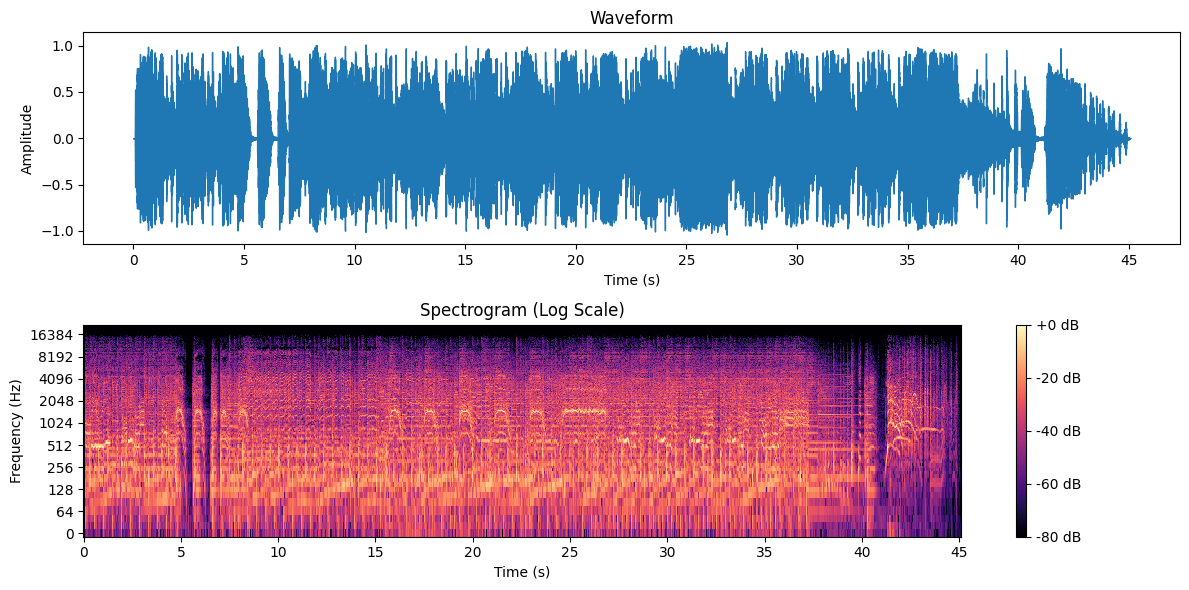

In [48]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(arousal_high))
audio_id = 0
if not arousal_high.empty:
    print("arousal_high Example:", arousal_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(arousal_high.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


# Valence low

Id can be 0 to  5
Extreme Low Example: song_id         115.00
valence_mean      8.40
valence_std       0.66
arousal_mean      7.80
arousal_std       1.17
Name: 89, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/198.mp3


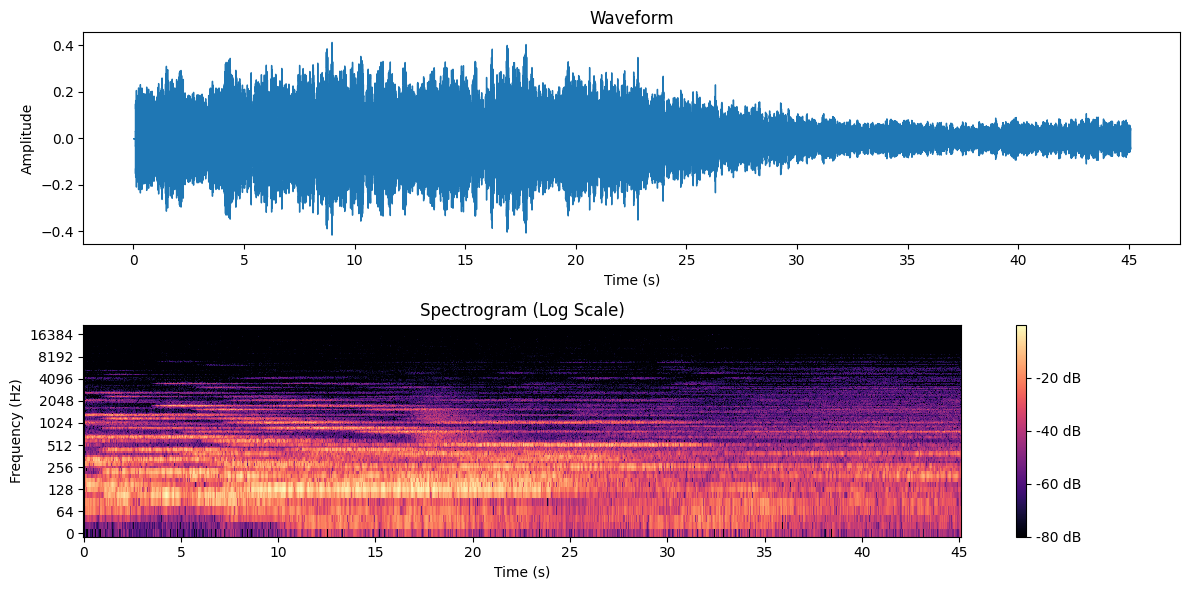

In [44]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_low))
audio_id = 0
if not arousal_high.empty:
    print("Valence Low Example:", arousal_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_low.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


# Valence Medium

Id can be 0 to  52
Valence Low Example: song_id         150.00
valence_mean      5.00
valence_std       2.45
arousal_mean      5.40
arousal_std       2.20
Name: 120, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/150.mp3


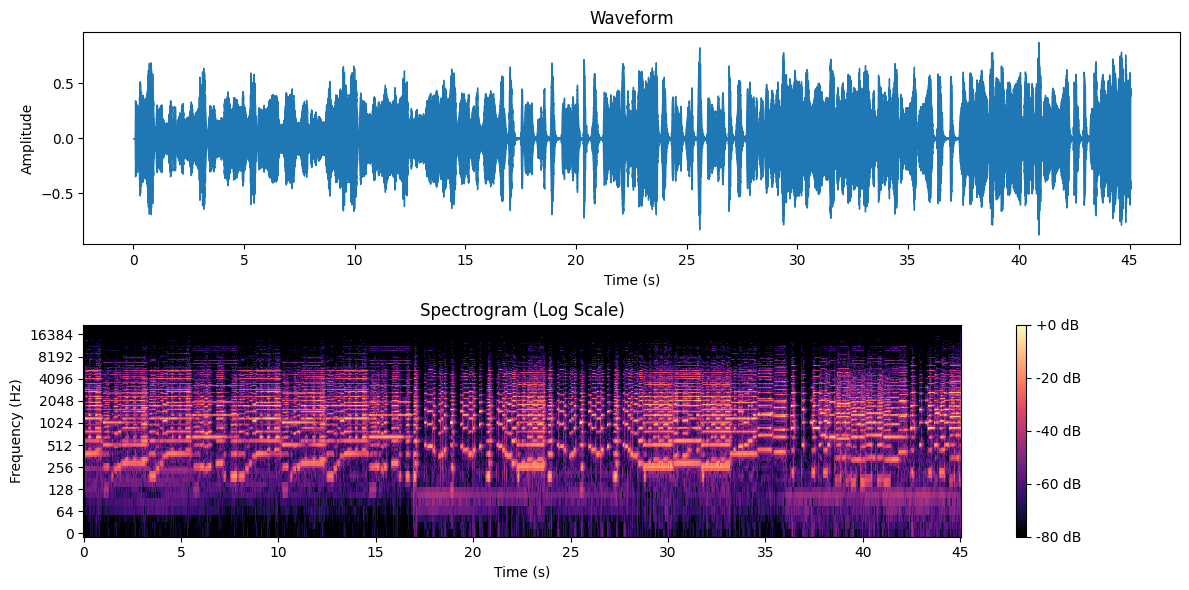

In [49]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_medium))
audio_id = 0
if not valence_medium.empty:
    print("Valence Low Example:", valence_medium.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_medium.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)


# Valence High

Id can be 0 to  10
Valence Low Example: song_id         25.00
valence_mean     7.90
valence_std      0.70
arousal_mean     4.70
arousal_std      2.53
Name: 16, dtype: float64
Playing: /kaggle/input/deam-mediaeval-dataset-emotional-analysis-in-music/DEAM_audio/MEMD_audio/25.mp3


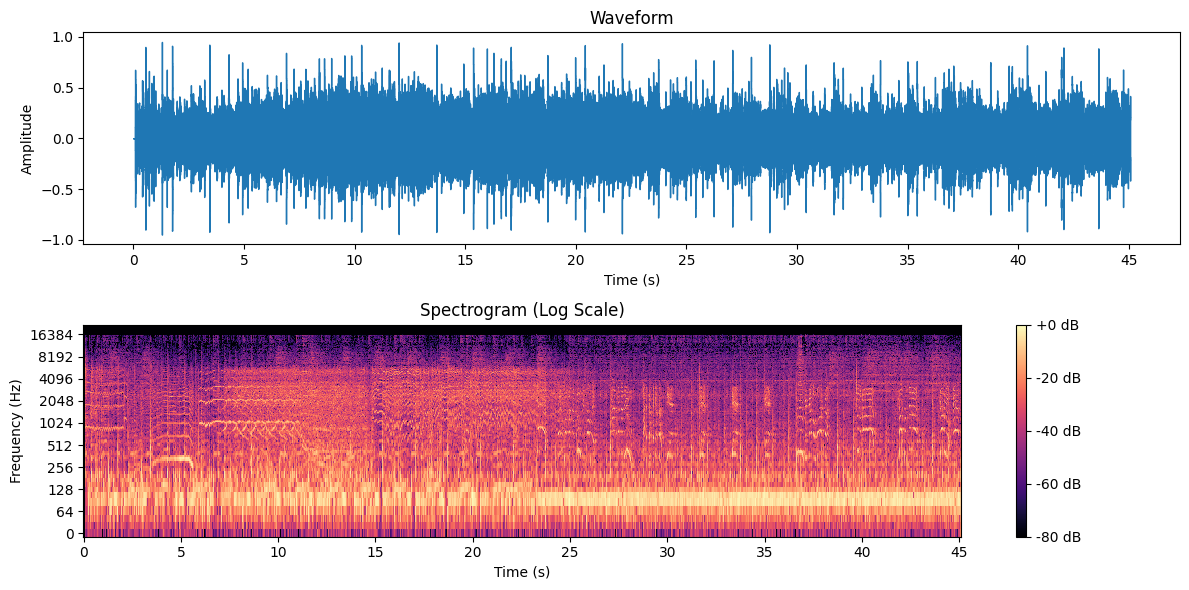

In [51]:
# Example: Play one audio from each category
print("Id can be 0 to ",len(valence_high))
audio_id = 0
if not valence_high.empty:
    print("Valence Low Example:", valence_high.iloc[0])
    final_audio_path = os.path.join(audio_path, f"{int(valence_high.iloc[audio_id]['song_id'])}.mp3")  # Corrected syntax
    play_audio_with_visuals(final_audio_path)
